## Primordial Black Holes (in Dark Matter clothing)

See the associated notes for more details.

*NB:* All distances in pc. 

For reference, the Schwarzschild radius for a 30 solar mass black hole is about $3 \times 10^{-12} \,\mathrm{pc}$.

The UCMH truncation radius is ~ 0.02 pc for a 30 solar mass PBH. **This is indicated on the plots as a dashed line**.

### Some initialisation stuff:

In [7]:
%matplotlib inline
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as pl

from scipy.integrate import quad, dblquad
from scipy.interpolate import interp2d,RectBivariateSpline

#Change default font size so you don't need a magnifying glass
matplotlib.rc('font', **{'size'   : 15})

### Some function definitions, PDFs etc.

In [8]:
#Mean PBH separation at z_eq (in pc)
def xbar(f, M_PBH):
    return 3e-1*((M_PBH/30.0)**(1.0/3.0))*(f**(-1.0/3.0))

In [9]:
#Maximum eccentricity
def emax(a, f, M_PBH=30.0):
    return np.sqrt(1.0-(f**1.5)*(a/xbar(f, M_PBH))**1.5)

In [10]:
#PeriBH
def periBH(a, e, f, M_PBH=30.0):
    if (e > emax(a, f, xbar(f, M_PBH))):
        return 0.0
    else:
        return a*(1.0-e)

In [11]:
#PDF for a and e
def P_ae(a, e, f, M_PBH=30.0):
    if (e > emax(a, f, M_PBH)):
        return 0.0
    else:
        return 0.75*(f**1.5)*(xbar(f, M_PBH)**(-1.5))*(a**0.5)*e*(1-e**2)**-1.5

In [12]:
#PDF for a and periBH
def P_ar(a, r, f, M_PBH=30.0):
    if ((r < a*(1-emax(a, f, M_PBH)))or(r > a)):
        return 0.0
    else:
        return 0.75*(f**1.5)*(xbar(f, M_PBH)**(-1.5))*(a**-0.5)*(1.0-r*1.0/a)*(r*2.0/a - (r*1.0/a)**2)**-1.5

In [13]:
#Truncation radius of UCMH at z = z_eq:
def r_trunc(M_PBH=30.0):
    return 2e-2*(M_PBH/30.0)**(1.0/3.0)

### Probability distribution of semi-major axis and eccentricity

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


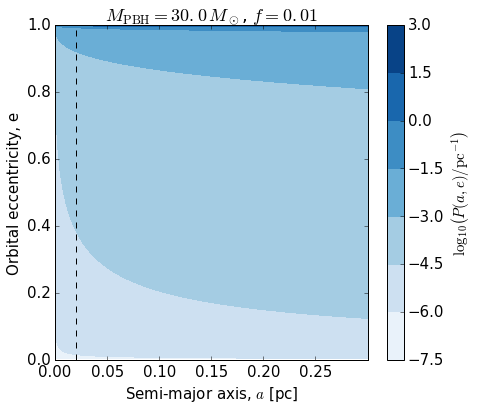

In [14]:
#Let's fix a reference value for f and M_PBH
M_PBH = 30.0
f_ref = 1e-2

#Corresponding maximum value for a:
a_max = (f_ref**(1.0/3.0))*xbar(f_ref, M_PBH)

#Generate a grid in (a, e)
a_list = np.linspace(0.0, a_max, 201)
e_list = np.linspace(0.0, 0.9999,201)
a_grid, e_grid = np.meshgrid(a_list, e_list, indexing='xy')


pl.figure(figsize=(7,6))

#Plotted filled contours of log10 of PDF of a, e
P_ae_vec = np.vectorize(P_ae, excluded=(2,3))
pl.contourf(a_grid, e_grid, np.log10(P_ae_vec(a_grid, e_grid, f_ref, M_PBH)), cmap="Blues")
pl.colorbar(label=r"$\log_{10}\left(P(a, e)/\mathrm{pc}^{-1} \right)$")

#Plot the maximum value of the eccentricity
pl.plot(a_list, emax(a_list, f_ref, M_PBH), 'k-', lw=2.0)

#Plot the truncation radius of the DM halo
pl.axvline(r_trunc(M_PBH), linestyle='--', color='k')

#Add some labels
pl.xlabel("Semi-major axis, $a$ [pc]")
pl.ylabel("Orbital eccentricity, e")
pl.title(r"$M_\mathrm{PBH} = " + str(M_PBH) + "\,M_\odot$, $f = " + str(f_ref) + "$")

pl.xlim(0, a_max)

pl.savefig("../plots/PDF_axis_eccentricity.pdf", bbox_inches="tight")
pl.show()

### PeriBH as a function of semi-major axis and eccentricity

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


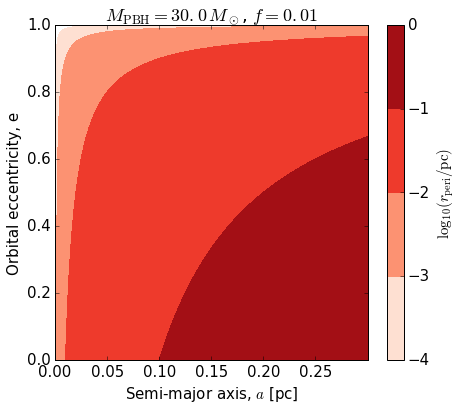

In [15]:
#Let's fix a reference value for f and M_PBH
M_PBH = 30.0
f_ref = 1e-2

#Corresponding maximum value for a:
a_max = (f_ref**(1.0/3.0))*xbar(f_ref, M_PBH)

#Generate a grid in (a, e)
a_list = np.linspace(0, a_max, 201)
e_list = np.linspace(0, 0.999,201)
a_grid, e_grid = np.meshgrid(a_list, e_list, indexing='xy')

pl.figure(figsize=(7,6))

#Plotted filled contours of log10 of periBH (divided by a)
periBH_vec = np.vectorize(periBH)
pl.contourf(a_grid, e_grid, np.log10(periBH_vec(a_grid, e_grid,f_ref, M_PBH)), levels=[-4,-3,-2,-1,0], cmap="Reds")
pl.colorbar(label=r"$\log_{10}(r_\mathrm{peri}/\mathrm{pc})$")

#Plot the maximum value of the eccentricity
pl.plot(a_list, emax(a_list, f_ref, M_PBH), 'k-', lw=2.0)

#Add some labels
pl.xlabel("Semi-major axis, $a$ [pc]")
pl.ylabel("Orbital eccentricity, e")
pl.title(r"$M_\mathrm{PBH} = " + str(M_PBH) + "\,M_\odot$, $f = " + str(f_ref) + "$")

pl.xlim(0, a_max)

pl.savefig("../plots/periBH_map.pdf", bbox_inches="tight")
pl.show()

### Changing variables

Check parameter ranges (for changing the order of integration). First, shade in blue the range of allowed $r$ values for a given $a$:

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


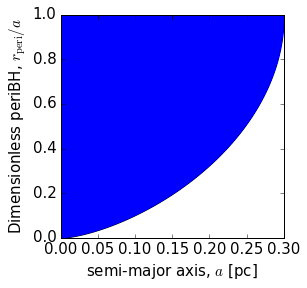

In [10]:
a_list = np.linspace(0.0, 1.0,1001)
r_list = 1- emax(a_list, 1.0)

pl.figure(figsize=(4,4))

pl.plot(a_list, r_list)
pl.fill_between(a_list, r_list, 1.0)

pl.xlabel(r"semi-major axis, $a$ [pc]")
pl.ylabel(r"Dimensionless periBH, $r_\mathrm{peri}/a$")

pl.show()

Now plot the same thing, but the allowed $a$ values as a function of $r$:

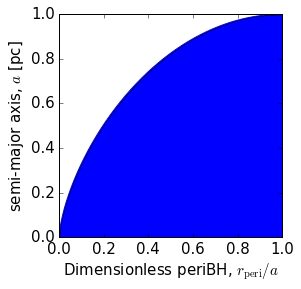

In [11]:
r_list = np.linspace(0.0, 1.0,1001)
a_list = (1.0-(1.0-r_list)**2.0)**(2.0/3.0)

pl.figure(figsize=(4,4))

pl.plot(r_list, a_list)
pl.fill_between(r_list, 0.0,a_list)

pl.ylabel(r"semi-major axis, $a$ [pc]")
pl.xlabel(r"Dimensionless periBH, $r_\mathrm{peri}/a$")

pl.show()

### Probability distribution of semi-major axis and periBH

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


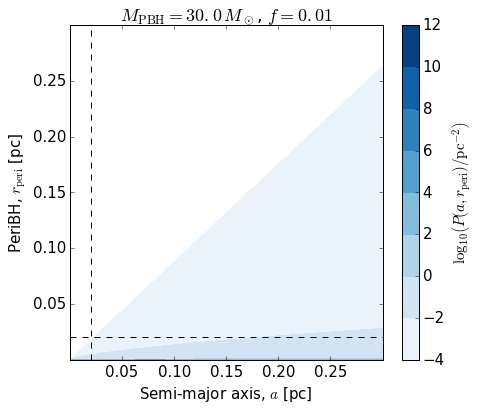

In [13]:
#Let's fix a reference value for f and M_PBH
M_PBH = 30.0
f_ref = 1e-2

#Corresponding maximum value for a:
a_max = (f_ref**(1.0/3.0))*xbar(f_ref, M_PBH)

#Generate a grid in (a, r)
a_list = np.logspace(-12, np.log10(a_max), 201)
r_list = np.logspace(-12, np.log10(a_max), 201)
a_grid, r_grid = np.meshgrid(a_list, r_list, indexing='xy')


pl.figure(figsize=(7,6))

#Plotted filled contours of log10 of PDF of a, r
P_ar_vec = np.vectorize(P_ar, excluded=(2,3))
pl.contourf(a_grid, r_grid, np.log10(P_ar_vec(a_grid, r_grid, f_ref, M_PBH)), cmap="Blues")
pl.colorbar(label=r"$\log_{10}\left(P(a, r_\mathrm{peri})/\mathrm{pc}^{-2} \right)$")

#Plot the minimum and maximum value of periBH
#pl.plot(a_list, a_list, 'k-', lw=2.0)
#pl.plot(a_list, a_list*(1-emax(a_list, f_ref, M_PBH)), 'k-', lw=2.0)

#Plot the truncation radius of the DM halo
pl.axvline(r_trunc(M_PBH), linestyle='--', color='k')
pl.axhline(r_trunc(M_PBH), linestyle='--', color='k')

#Add some labels
pl.xlabel("Semi-major axis, $a$ [pc]")
pl.ylabel("PeriBH, $r_\mathrm{peri}$ [pc]")
pl.title(r"$M_\mathrm{PBH} = " + str(M_PBH) + "\,M_\odot$, $f = " + str(f_ref) + "$")

#pl.xlim(0, a_max)
#pl.ylim(0, a_max)

pl.savefig("../plots/PDF_axis_periBH.pdf", bbox_inches="tight")
pl.show()

### Probability distribution of (dimensionless) periBH

In [13]:
def P_r(r):
    return 0.5*(1-r)*(2*r - r**2)**-0.5

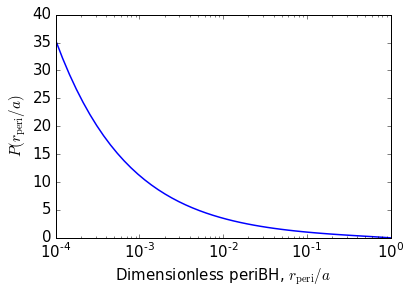

Distribution is normalised to:  0.5


In [14]:
pl.figure()

r_list = np.logspace(-4, 0)
pl.semilogx(r_list, P_r(r_list), linewidth=1.5)

pl.ylabel(r"$P(r_\mathrm{peri}/a)$")
pl.xlabel(r"Dimensionless periBH, $r_\mathrm{peri}/a$")

pl.savefig("../plots/PDF_dimensionless_periBH.pdf", bbox_inches="tight")
pl.show()

#Check the normalisation
print "Distribution is normalised to: ", quad(P_r, 0, 1)[0]

### Classifying different regimes

We can classify 3 regimes:
    - Isolated binaries, where r_peri is always much larger than the halo truncation radius
    - Common-halo binaries, where r_peri and a are both smaller than the halo truncation radius
    - Close-passage binaries, where  r_peri is below the halo truncation radius, but a is above

In [23]:
# PDF of a, for periBH in the range r1 to r2
def P_a(a, r1, r2, f, M_PBH):
    xb = xbar(f, M_PBH)
    t1 = r1*1.0/a
    t2 = r2*1.0/a
    return ((1-(1.0-t1)**2)**-0.5 - (1-(1.0-t2)**2)**-0.5)*(0.75*(f/xb)**(1.5))*a**0.5

In [24]:
#Calculate fraction of PBHs which form binaries (i.e. with x < f^(1/3) xbar)
#I've checked numerically that this calculation is correct
#NB: This roughly corresponds to the number of binaries you get per PBH (so 1/2 means that all PBHs form binaries)
def calc_frac_binary(f_ref, M_PBH):
    return (f_ref - 0.5*f_ref**2)

In [25]:
#Calculate fraction of isolated binaries
def calc_isolated(f_ref, M_PBH):
    r_tr = r_trunc(M_PBH)
    a_max = (f_ref**(1.0/3.0))*xbar(f_ref, M_PBH)
    integ_isolated = lambda x: P_a(x, np.maximum(x*(1.0-emax(x, f_ref, M_PBH)), r_tr), x, f_ref, M_PBH)
    return quad(integ_isolated, r_tr, a_max)[0]/calc_frac_binary(f_ref, M_PBH)

In [26]:
#Calculate fraction of common halo binaries
def calc_common(f_ref, M_PBH):
    r_tr = r_trunc(M_PBH)
    a_max = (f_ref**(1.0/3.0))*xbar(f_ref, M_PBH)
    integ_common = lambda x: P_a(x, x*(1.0-emax(x, f_ref, M_PBH)), x, f_ref, M_PBH)
    return quad(integ_common, 0.0, r_tr)[0]/calc_frac_binary(f_ref, M_PBH)

In [27]:
#Calculate fraction of close passage binaries
def calc_close(f_ref, M_PBH):
    r_tr = r_trunc(M_PBH)
    #r_tr = 1e-10
    a_max = (f_ref**(1.0/3.0))*xbar(f_ref, M_PBH)
    integ_close = lambda x: P_a(x, x*(1.0-emax(x, f_ref, M_PBH)), np.maximum(r_tr,x*(1.0-emax(x, f_ref, M_PBH))), f_ref, M_PBH)
    return quad(integ_close, r_tr, a_max)[0]/calc_frac_binary(f_ref, M_PBH)

In [28]:
#Let's fix a reference value for M_PBH (although it looks like there isn't much dependence on M_PBH...)
M_PBH = 30.0


print calc_close(1e-2, M_PBH)
#Calculate for a range of values of f
f_list = np.logspace(-3, 0,200)
frac_binaries = [calc_frac_binary(f, M_PBH) for f in f_list]
frac_isolated = [calc_isolated(f, M_PBH) for f in f_list]
frac_common = [calc_common(f, M_PBH) for f in f_list]
frac_close = [calc_close(f, M_PBH) for f in f_list]

0.86254209504


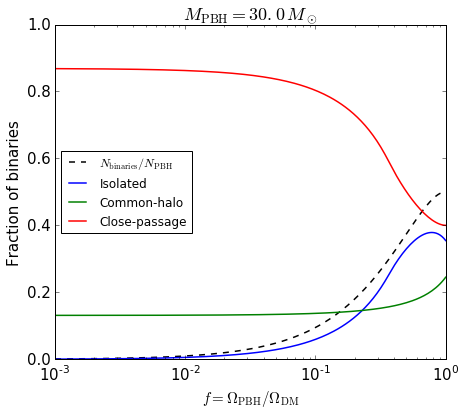

In [36]:
#Do some plotting

pl.figure(figsize=(7,6))

pl.semilogx(f_list, frac_binaries, 'k--', label=r"$N_\mathrm{binaries}/N_\mathrm{PBH}$", lw=1.5)
pl.semilogx(f_list, frac_isolated, '-',label="Isolated", lw=1.5)
pl.semilogx(f_list, frac_common, '-',label="Common-halo", lw=1.5)
pl.semilogx(f_list, frac_close, '-',label="Close-passage", lw=1.5)

pl.legend(fontsize=12.0, loc='best')

pl.ylabel("Fraction of binaries")
pl.xlabel(r"$f = \Omega_\mathrm{PBH}/\Omega_\mathrm{DM}$")

pl.title(r"$M_\mathrm{PBH} = " + str(M_PBH) + "\,M_\odot$")

pl.ylim(0, 1)
pl.savefig("../plots/Binary_fractions.pdf", bbox_inches="tight")
pl.show()

### Fraction of binaries within 100 Schwarzschild Radii

### Coalescence time

In [5]:
G = 4.302e-3 #(pc/solar mass) (km/s)^2


def t_coal(a, e, M_PBH=30.0):
    Q = (3.0/170.0)*(G*M_PBH)**-3 # s^6 pc^-3 km^-6
    tc = Q*a**4*(1-e**2)**(7.0/2.0) #s^6 pc km^-6
    tc *= 3.086e+13 #s^6 km^-5
    tc *= (3e5)**5 #s
    return tc/(60*60*24*365) #in years

def t_coal_min(a, f):
    return t_coal(a, emax(a, f, M_PBH))

#Characteristic eccentricity, given a coalescence time (in years)
#and semi-major axis
def char_ecc(a, t, M_PBH=30.0):
    Q = (3.0/170.0)*(G*M_PBH)**-3 # s^6 pc^-3 km^-6
    t_s = t*(60*60*24*365)/((3e5)**5*3.086e+13) #s^6 km^-5
    j = (t_s/(Q*a**4))**(1.0/7.0)
    return np.sqrt(1.0-j**2)


7.13193475203e+29
0.5


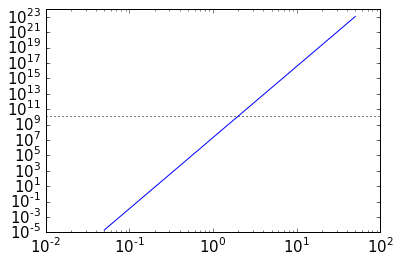

In [19]:
alist = np.logspace(-3, 0)
pl.figure()
pl.loglog(alist/r_trunc(M_PBH=30.0), t_coal_min(alist,1e-2))
pl.axhline(14e9, linestyle=':', color='k')
pl.show()

**Coalesence time as a function of (a,e)**

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log10


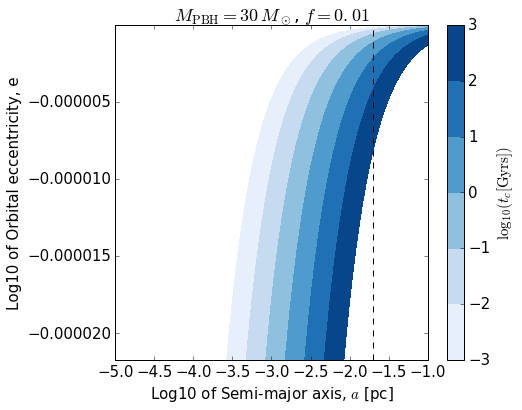

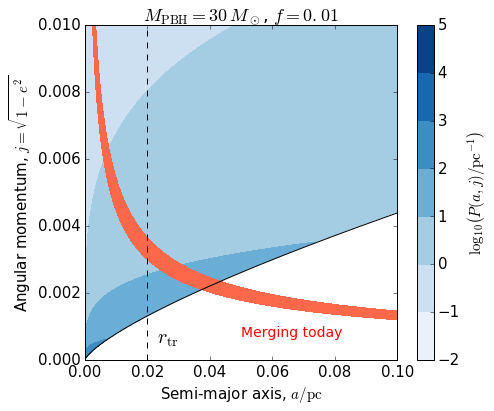

In [110]:
#Let's fix a reference value for f and M_PBH
M_PBH = 30.0
f_ref = 1e-2

#Corresponding maximum value for a:
a_max = (f_ref**(1.0/3.0))*xbar(f_ref, M_PBH)

#Generate a grid in (a, e)
a_list = np.logspace(-5, -1, 501)
#e_list = np.logspace(np.log10(0.999), np.log10(0.99999999),201)
j_list = np.logspace(-5, -2, 501)
#e_list = np.sqrt(1-j_list**2)
a_grid, j_grid = np.meshgrid(a_list, j_list, indexing='xy')

e_grid = np.sqrt(1-j_grid**2)

#da_list = np.append(1e-10,np.diff(a_list))
#de_list = np.append(1e-10,np.diff(e_list))

da_grid, de_grid = np.meshgrid(da_list, de_list, indexing='xy')

pl.figure(figsize=(7,6))

#Plotted filled contours of log10 of PDF of a, e
pl.contourf(np.log10(a_grid), np.log10(e_grid), np.log10(t_coal(a_grid, e_grid, M_PBH)*1e-9), cmap="Blues", levels=[-3.0,-2,-1,0,1,2,3])
pl.colorbar(label=r"$\log_{10}\left(t_c [\mathrm{G yrs}]\right)$")

#Plot the maximum value of the eccentricity
#pl.plot(a_list, emax(a_list, f_ref, M_PBH), 'k-', lw=2.0)

#Plot the truncation radius of the DM halo
pl.axvline(np.log10(r_trunc(M_PBH)), linestyle='--', color='k')

#Add some labels
pl.xlabel("Log10 of Semi-major axis, $a$ [pc]")
pl.ylabel("Log10 of Orbital eccentricity, e")
pl.title(r"$M_\mathrm{PBH} = " + str(int(M_PBH)) + "\,M_\odot$, $f = " + str(f_ref) + "$")

#pl.xlim(0, np.max(a_list))

#pl.savefig("../plots/t_coalescence.pdf", bbox_inches="tight")

pl.figure(figsize=(7,6))

#Plotted filled contours of log10 of PDF of a, e
P_ae_vec = np.vectorize(P_ae, excluded=(2,3))
cf = pl.contourf(a_grid,j_grid, np.log10(P_ae_vec(a_grid, e_grid, f_ref, M_PBH)*(j_grid/e_grid)), cmap="Blues")
pl.colorbar(cf,label=r"$\log_{10}\left(P(a, j)/\mathrm{pc}^{-1} \right)$")

#Plot the maximum value of the eccentricity
pl.plot(a_list, np.sqrt(1-emax(a_list, f_ref, M_PBH)**2), 'k-', lw=1.0)

#Plot the truncation radius of the DM halo
pl.axvline(r_trunc(M_PBH), linestyle='--', color='k')

pl.contourf(a_grid, j_grid, np.log10(t_coal(a_grid, e_grid, M_PBH)/(13.5e9)), cmap="Reds", levels=[-0.3,0.3])

pl.text(0.05, 0.0007,"Merging today",color='Red',fontsize=14.0)
pl.text(0.023, 0.0005, r"$r_\mathrm{tr}$", color='k', fontsize=20.0)

#Add some labels
pl.xlabel("Semi-major axis, $a/\mathrm{pc}$")
pl.ylabel("Angular momentum, $j = \sqrt{1-e^2}$")
pl.title(r"$M_\mathrm{PBH} = " + str(int(M_PBH)) + "\,M_\odot$, $f = " + str(f_ref) + "$")

#pl.xlim(0, np.max(a_list))

pl.xlim(0, 0.1)
pl.ylim(0, 0.01)

pl.savefig("../plots/PDF_mergetoday.pdf",bbox_inches="tight")

pl.show()

In [78]:
print 10**(0.3)
print 10**(-0.3)

1.99526231497
0.501187233627


In [59]:
t_univ = 13.5e9
t_coal_1 = t_univ*0.5
t_coal_2 = t_univ*1.5

#Calculate fraction of isolated binaries
def calc_common_mergenow(f_ref, M_PBH):
    r_tr = r_trunc(M_PBH)
    a_max = (f_ref**(1.0/3.0))*xbar(f_ref, M_PBH)
    
    r1 = lambda x: np.maximum(x*(1-emax(x, f_ref, M_PBH)),x*(1-char_ecc(x, t_coal_1, M_PBH)))
    r2 = lambda x: np.maximum(x*(1-emax(x, f_ref, M_PBH)),x*(1-char_ecc(x, t_coal_2, M_PBH)))
    
    integ = lambda x: P_a(x, r1(x), r2(x) , f_ref, M_PBH)
    return quad(integ, 0, r_tr)[0]/calc_frac_binary(f_ref, M_PBH)

#Calculate fraction of isolated binaries
def calc_close_mergenow(f_ref, M_PBH):
    r_tr = r_trunc(M_PBH)
    a_max = (f_ref**(1.0/3.0))*xbar(f_ref, M_PBH)
    
    r1 = lambda x: np.maximum(x*(1-emax(x, f_ref, M_PBH)),x*(1-char_ecc(x, t_coal_1, M_PBH)))
    r2 = lambda x: np.maximum(x*(1-emax(x, f_ref, M_PBH)),x*(1-char_ecc(x, t_coal_2, M_PBH)))
    
    integ = lambda x: P_a(x, r1(x), r2(x) , f_ref, M_PBH)
    return quad(integ, r_tr, a_max)[0]/calc_frac_binary(f_ref, M_PBH)

In [53]:
print calc_common_mergenow(1e-2, 30.0)
print calc_close_mergenow(1e-2, 30.0)
print calc_close(1e-2,30.0)

0.00303779782082
0.00948157361129
0.86254209504


** PDF for the coalescence time **

In [ ]:
def P_t(t, f, M_PBH):
    Q = (3.0/170.0)*(G*M_PBH)**-3 # s^6 pc^-3 km^-6
    T = 3.086e+13*Q*(xbar(f, M_PBH)/f)**4